
## <font color=red> You should not import any new libraries. Your code should run with python=3.x</font>

- Your solutions will be auto-graded. Hence we request you to follow the instructions.
- Modify the code only between 
```
## TODO
## END TODO
```
- In addition to above changes, you can play with arguments to the functions for generating plots
- We will run the auto grading scripts with private test data

In [12]:
import numpy as np
from matplotlib import pyplot as plt
import math

# KMeans Algorithm

In [13]:
class Kmeans:
    """
    Implementing Kmeans algorithm.

    You may choose to define additional helper function within this class, however don't change the protype of `fit` and `predict` classes.   
    """

    def __init__(self, n_clusters, random_state):
        """
        Implement of kMeans algorithm

        Args:
        n_clusters: int - no. of clusters
        random_state: int - changing this should change initial cluster centers
        """

        self.n_clusters = n_clusters
        self.random_state = random_state

    
    def fit(self, X):
        """
        Implement of kMeans algorithm and stores cluster centers as class object

        Args:
        X : numpy array of shape (n_samples, 2)
        
        Returns:
        Nothing
        """
        ## TODO
        np.random.seed(self.random_state)
        m = X.shape[0]
        n = X.shape[1]
        max_iters = 500
        
        self.centroids = np.zeros((self.n_clusters, n))
        self.centroids[0, :] = X[np.random.randint(0, m-1), :]
        
        for k in range(self.n_clusters - 1):
            
            distances = np.zeros(m)
            for i in range(m): 
                distances[i] = np.min(np.square(np.linalg.norm(X[i, :] - self.centroids, axis = 1)))
                
            self.centroids[k+1, :] = X[np.argmax(distances), :]
            
        for iter in range(max_iters):
            
            distance = np.zeros((m, self.n_clusters))
            temp = np.zeros((self.n_clusters, n))
            
            for k in range(self.n_clusters):
                distance[:, k] = np.square(np.linalg.norm(X - self.centroids[k, :], axis = 1))
            
            self.pred = np.argmin(distance, axis = 1)
            
            for k in range(self.n_clusters):
                temp_points = X[self.pred == k, :]
                temp[k, :] = np.mean(temp_points, axis = 0)
            
            if (temp == self.centroids).all():
                break
            self.centroids = temp
         
        ## END TODO
    
    def predict(self, X):
        """
        Uses the stored cluster centers from fit to predict labels. 
        Args:
        X : numpy array of shape (n_samples, 2)
        
        Returns:
        Y: Labels for each of the data point in X. np
        """
        Y = None
        ## TODO 
        
        distance = np.zeros((X.shape[0], self.n_clusters))
        
        for k in range(self.n_clusters):
            distance[:, k] = np.square(np.linalg.norm(X - self.centroids[k, :], axis = 1))
            
        Y = np.argmin(distance, axis = 1)

        ## END TODO
        assert Y.shape == (X.shape[0],), "Return Y in expected format"
        return Y

## LOAD DATA 1

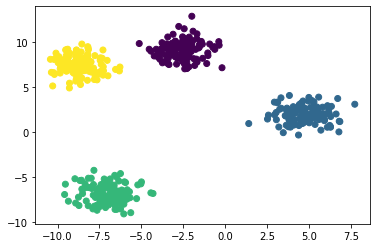

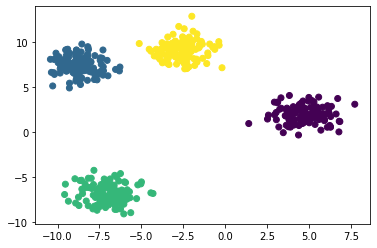

In [14]:
X = np.load('./data/train_X_1.npy')
Y = np.array([np.load('./data/train_Y_1.npy')]).T
Y = np.squeeze(Y)

plt.scatter(X[:,0],X[:,1],c=Y)
plt.figure()

km = Kmeans(4,123)
km.fit(X)
y_pred = km.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)

## LOAD DATA 2

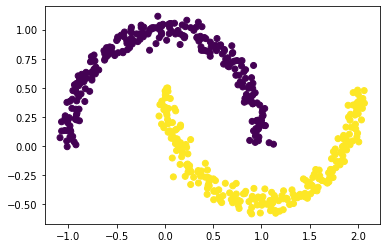

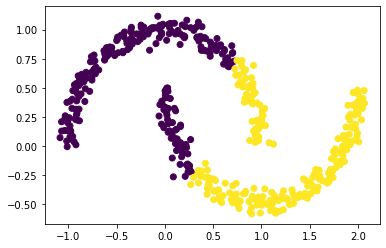

In [15]:
X = np.load('./data/train_X_2.npy')
Y = np.array([np.load('./data/train_Y_2.npy')]).T
Y = np.squeeze(Y)

plt.scatter(X[:,0],X[:,1],c=Y)
plt.figure()

km = Kmeans(2,123)
km.fit(X)
y_pred = km.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)

## LOAD DATA 3

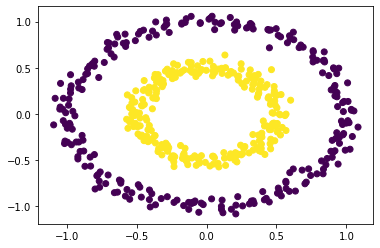

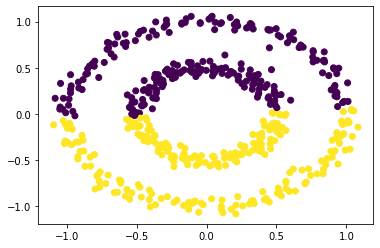

In [16]:
X = np.load('./data/train_X_3.npy')
Y = np.array([np.load('./data/train_Y_3.npy')]).T
Y = np.squeeze(Y)

plt.scatter(X[:,0],X[:,1],c=Y)
plt.figure()

km = Kmeans(2,123)
km.fit(X)
y_pred = km.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)

# Simple Kernel Design

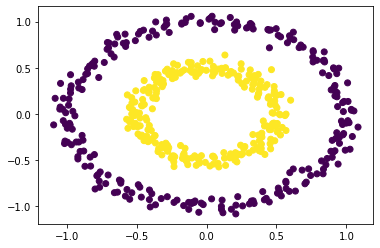

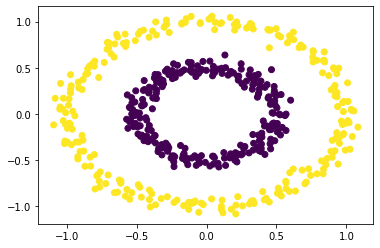

In [17]:
class Kmeans_Kernel:
    """
    Implementing Kmeans algorithm.

    You may choose to define additional helper function within this class, however don't change the protype of `fit` and `predict` classes.   
    """

    def __init__(self, n_clusters, random_state):
        """
        Implement of kMeans algorithm 

        Args:
        n_clusters: int - no. of clusters
        random_state: int - changing this should change initial cluster centers
        """

        self.n_clusters = n_clusters
        self.random_state = random_state

    def make_zero_centered(self, X):
        """
        Returns a zero-centered concentric circles Dataset

        Args:
        X : numpy array of shape (n_samples, 2)
        
        Returns:
        X : numpy array of shape (n_samples, 2)
        """
        ## TODO
        X = X - np.mean(X, axis = 0)
        ## END TODO

        return X

    
    def fit(self, X):
        """
        Implement of kMeans algorithm along with using a suitable kernel and stores cluster centers as class object

        Args:
        X : numpy array of shape (n_samples, 2)
        
        Returns:
        Nothing
        """
        ## TODO
        np.random.seed(self.random_state)
        X = self.make_zero_centered(X)
        m = X.shape[0]
        n = X.shape[1]
        max_iters = 100
         
        self.centroids = np.zeros((self.n_clusters, n))
        self.centroids[0, :] = X[np.random.randint(0, m-1), :]
        
        for k in range(self.n_clusters - 1):
            
            distances = np.zeros(m)
            for i in range(m): 
                distances[i] = np.min(np.square(np.linalg.norm(X[i, :] - self.centroids, axis = 1)))
                
            self.centroids[k+1, :] = X[np.argmax(distances), :]
        
        distance = np.zeros((m, self.n_clusters))
            
        for k in range(self.n_clusters):
            distance[:, k] = np.square(np.linalg.norm(X - self.centroids[k, :], axis = 1))
            
        self.pred = np.argmin(distance, axis = 1)
        self.pred_class = []
        
        for k in range(self.n_clusters):
            self.pred_class.append(X[self.pred == k])
            
        # Iteration Starts here
    
        for iter in range(max_iters):
            distance = np.zeros((m, self.n_clusters))
            
            for k in range(self.n_clusters):
                distance[:, k] = np.square(np.linalg.norm(X, axis = 1))
                
                lent = len(self.pred_class[k])
                if lent == 0:
                    continue
                
                g_m = np.reshape(np.linalg.norm(self.pred_class[k], axis=1), (lent, 1))
                distance[:, k] += np.sum(np.matmul(g_m, g_m.T))/np.square(lent)
                distance[:, k] -= 2*np.linalg.norm(X, axis=1)*np.mean(np.linalg.norm(self.pred_class[k], axis = 1))
                                                     
            temp = np.argmin(distance, axis = 1)
            
            if (temp == self.pred).all():
                break
            
            self.pred = temp
            self.pred_class = []
        
            for k in range(self.n_clusters):
                self.pred_class.append(X[self.pred == k])
            
        ## END TODO
    
    def predict(self, X):
        """
        Uses the stored cluster centers from fit to predict labels using the kernel. 
        Args:
        X : numpy array of shape (n_samples, 2)
        
        Returns:
        Y: Labels for each of the data point in X.
        """
        ## TODO
        
        X = self.make_zero_centered(X)
        distance = np.zeros((X.shape[0], self.n_clusters))
        
        for k in range(self.n_clusters):
            distance[:, k] = np.square(np.linalg.norm(X, axis = 1))
                
            lent = len(self.pred_class[k])
            if lent == 0:
                continue
                
            g_m = np.reshape(np.linalg.norm(self.pred_class[k], axis=1), (lent, 1))
            distance[:, k] += np.sum(np.matmul(g_m, g_m.T))/np.square(lent)
            distance[:, k] -= 2*np.linalg.norm(X, axis=1)*np.mean(np.linalg.norm(self.pred_class[k], axis = 1))
                                                     
        Y = np.argmin(distance, axis = 1)
        
        return Y
        ## END TODO

X = np.load('./data/train_X_3.npy')
Y = np.array([np.load('./data/train_Y_3.npy')]).T
Y = np.squeeze(Y)

plt.scatter(X[:,0],X[:,1],c=Y)
plt.figure()

km = Kmeans_Kernel(2,123)
km.fit(X)
y_pred = km.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)